In [15]:
import skimage
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np
import os
import scipy.ndimage.morphology

In [3]:
path = '../data/images/img_0000021.jpg'
if os.environ.get('BATCH_RUN', False):
    path = os.environ['BATCH_RUN']

output_path = os.environ.get('BATCH_RUN_OUTPUT', '')

In [19]:
orig_img = skimage.io.imread(path)
img = orig_img

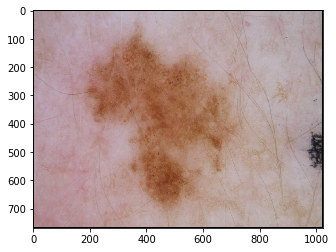

In [20]:
plt.imshow(img)

In [21]:
img = img.mean(2)

In [22]:
img.shape

(768, 1024)

In [23]:
img = img > threshold_otsu(img)

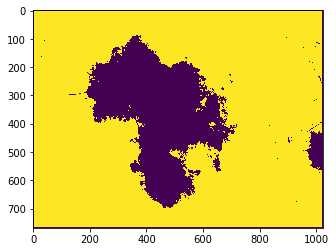

In [24]:
plt.imshow(img)

In [25]:
img = img == False

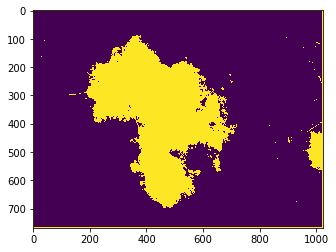

In [26]:
plt.imshow(img)

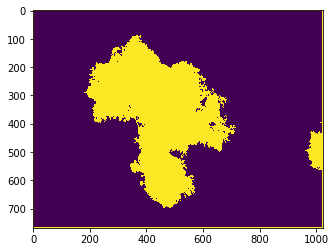

In [27]:
from skimage import morphology 
img = morphology.remove_small_objects(img, 1000)
plt.imshow(img)

In [36]:
img = morphology.remove_small_holes(img, 5000)

In [37]:
from skimage.measure import label, regionprops

In [38]:
labels = label(img)

In [39]:
center = tuple(np.array(img.shape) // 2)

In [40]:
center_patch = labels == labels[center[0], center[1]]

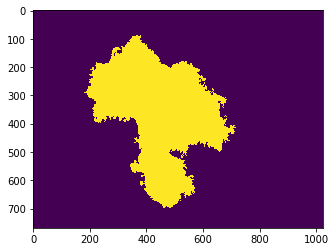

In [41]:
plt.imshow(center_patch)

In [44]:
removed = orig_img.copy()

In [45]:
removed[center_patch == False] = 0

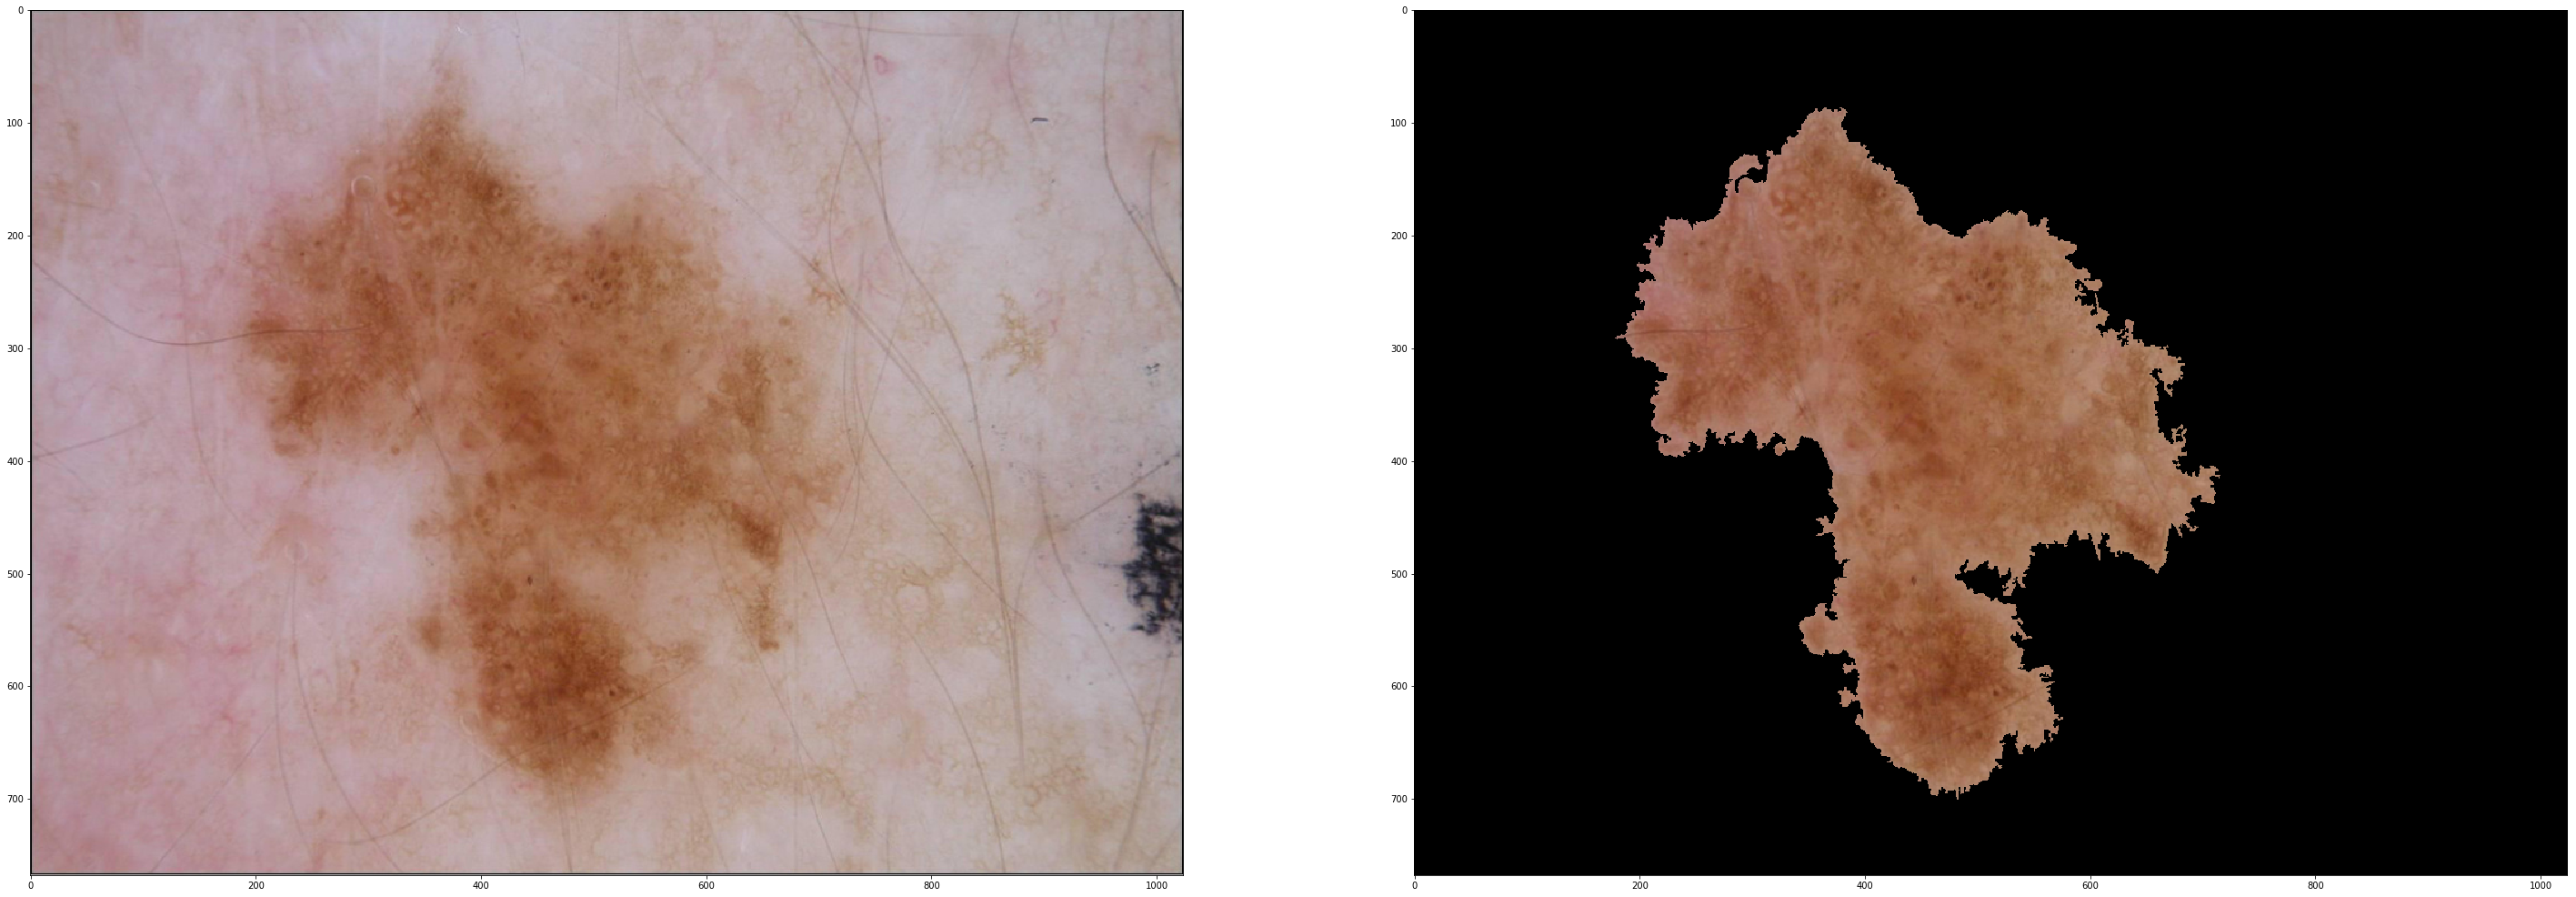

In [46]:
plt.figure(0,figsize=(50, 50))
plt.subplot(121)
plt.imshow(orig_img)
plt.subplot(122)
plt.imshow(removed)


In [22]:
if (output_path):
    height, width, _ = removed.shape
    height =  height / width * 50
    plt.figure(0, figsize=(height, 50))
    plt.clf()
    plt.subplot(221)
    plt.imshow(orig_img)
    plt.subplot(222)
    plt.imshow(removed)
    plt.subplot(223)
    plt.imshow(img)
    plt.savefig(output_path)